In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
import numpy as np
import json
from pycocotools.coco import COCO
import tqdm

# Input relevant notebook settings
sns.set_style('ticks')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 90)

In [2]:
DATASET_PATH = './data/taco/'

# Initialize class labels
class_labels = {0: "Aluminium Foil",
                1: "Bottle",
                2: "Bottle Cap",
                3: "Can",
                4: "Carton",
                5: "Cup",
                6: "Food Waste",
                7: "Other Plastic",
                8: "Paper Trash",
                9: "Plastic Trash",
                10: "Unlabeled Litter",
                11: "Cigarette"}

<img src='https://albumentations.ai/docs/images/getting_started/augmenting_bboxes/bbox_formats.jpg' width='60%'>

In [124]:
# Function to locate Bounding Boxes in Litter Image based on YOLO bounding box format
import math

def show_bbox(path: str) -> None:

    im = Image.open(path)
    im_width, im_height = im.size
    
    img_name = os.path.basename(path).split('.')[0] + '.txt'
    
    with open(os.path.join('./data/taco/labels/train/', img_name)) as file:
        bbox = []
        annotations = file.readlines()
        for line in annotations:
            bbox.append([float(x) for x in line.split()])
    
    if len(bbox) % 2 == 0:
        # Create Grid of Images from Sample
        fig, axs = plt.subplots(nrows=math.ceil(len(bbox)/2), ncols=math.ceil(len(bbox)/2), figsize=(len(bbox)*2, len(bbox)*2))
        fig.suptitle(f'Image: {img_name}', fontsize=16)        
        # axs = axs.flatten()
    elif len(bbox) == 1:
        # Create Grid of Images from Sample
        fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(len(bbox)*2, len(bbox)*2))
        fig.suptitle(f'Image: {img_name}', fontsize=16) 
    else:
        # Create Grid of Images from Sample
        fig, axs = plt.subplots(nrows=len(bbox)//3, ncols=3, figsize=(len(bbox)*2, len(bbox)*2))
        fig.suptitle(f'Image: {img_name}', fontsize=16) 
    
    for index in range(len(bbox)):
        x_center = bbox[index][1]
        y_center = bbox[index][2]
        crop_width = bbox[index][3] * im_width
        crop_height = bbox[index][4] * im_height
        
        # Setting the points for cropped image
        left = x_center * im_width - crop_width/2
        top = y_center * im_height - crop_height/2
        right = x_center * im_width + crop_width/2
        bottom = y_center * im_height + crop_width/2
        
        img_crop = im.crop((left, top, right, bottom))
        # Add the Image to the Axis
        if len(bbox) > 2:
            axs = axs.flatten()
            axs[index].imshow(img_crop)
            # Add an Axes Title
            axs[index].set(title=f"Class Label: {int(bbox[index][0])}")
        else:
            plt.imshow(img_crop)
        

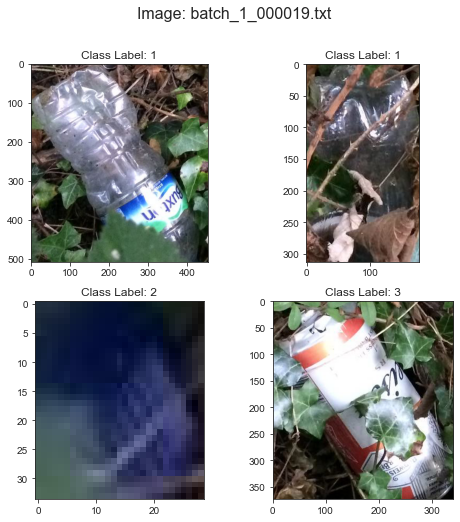

In [121]:
show_bbox(path='./data/taco/images/train/batch_1_000019.jpg')

In [122]:
import re
import random

# Generate all file names in directory
file_names = [x for x in os.listdir(os.path.join(DATASET_PATH, 'images/train')) if re.search("^[0-9a-zA-Z]+", x)]

# Randomly take out 9 samples from list
sample_names = random.sample(file_names, 9)

sample_names

['batch_2_000054.JPG',
 'batch_7_000089.JPG',
 'batch_6_000045.JPG',
 'batch_2_000094.JPG',
 'batch_6_000060.JPG',
 'batch_12_000040.jpg',
 'batch_3_IMG_4883.JPG',
 'batch_13_000036.jpg',
 'batch_9_000046.jpg']

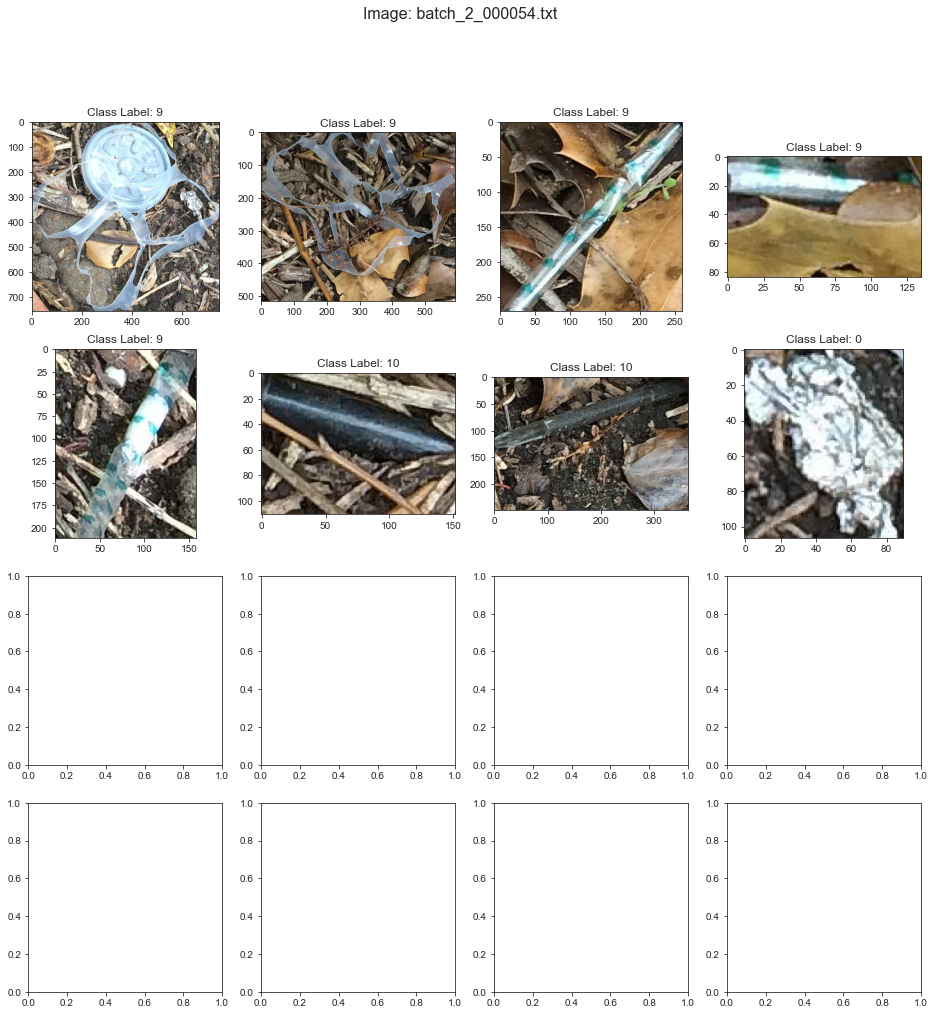

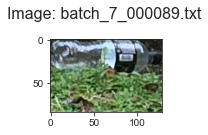

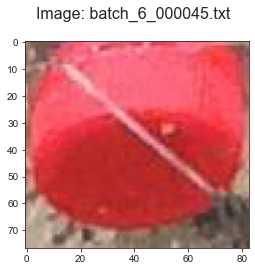

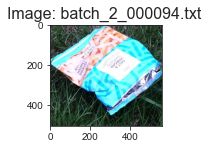

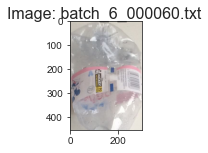

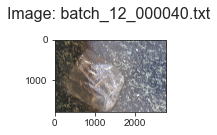

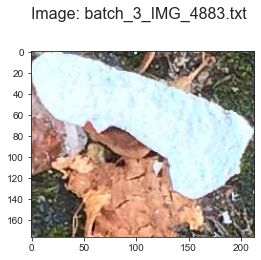

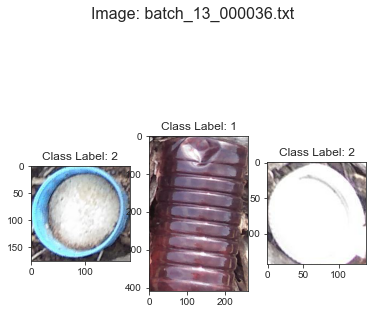

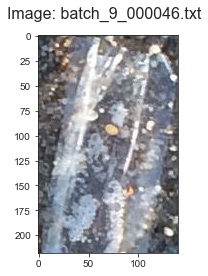

In [125]:
# Generate all labels and cropped images from samples
for item in sample_names:
    show_bbox(path=os.path.join(DATASET_PATH, 'images/train', item))